IEEE-754 Analysis http://babbage.cs.qc.cuny.edu/IEEE-754/

In [1]:
bitstring(Float32(1.0))

"00111111100000000000000000000000"

In [2]:
bitstring(Float64(1.0))

"0011111111110000000000000000000000000000000000000000000000000000"

In [3]:
# domyślnie Float64
bitstring(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

In [4]:
# Float16
bitstring(Float16(1.0))

"0011110000000000"

In [5]:
# znak, cecha, mantysa
#uwaga - w Julii tablice indeksujemy od 1
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(Float32(1.0))

('0', "01111111", "00000000000000000000000")

In [6]:
println(significand(Float32(1.0)), "*2^", exponent(Float32(1.0)))

1.0*2^0


In [7]:
# co ile liczby sa reprezentowane 
c=Float32[]
a=Float32(1.0)
r=1:10
for i=r
    push!(c, a)
    a=nextfloat(a)
end
map(x-> bitstring(x),c)

10-element Array{String,1}:
 "00111111100000000000000000000000"
 "00111111100000000000000000000001"
 "00111111100000000000000000000010"
 "00111111100000000000000000000011"
 "00111111100000000000000000000100"
 "00111111100000000000000000000101"
 "00111111100000000000000000000110"
 "00111111100000000000000000000111"
 "00111111100000000000000000001000"
 "00111111100000000000000000001001"

In [8]:
# Maszynowe epsilon mówi, jaki jest odstęp między kolejnymi liczbami zmiennoprzecinkowymi reprezentowanymi w komputerze
eps(Float32(1))

1.1920929f-7

In [9]:
eps(Float32)


1.1920929f-7

In [10]:
# Badanie postaci zdenormalizowanej. Co się dzieje, jak liczby są coraz mniejsze?
a=Float32(1.1)
for i=1:149
    a=a/Float32(2.0)
    println(decode(a), "  ", issubnormal(a))
end

('0', "01111110", "00011001100110011001101")  false
('0', "01111101", "00011001100110011001101")  false
('0', "01111100", "00011001100110011001101")  false
('0', "01111011", "00011001100110011001101")  false
('0', "01111010", "00011001100110011001101")  false
('0', "01111001", "00011001100110011001101")  false
('0', "01111000", "00011001100110011001101")  false
('0', "01110111", "00011001100110011001101")  false
('0', "01110110", "00011001100110011001101")  false
('0', "01110101", "00011001100110011001101")  false
('0', "01110100", "00011001100110011001101")  false
('0', "01110011", "00011001100110011001101")  false
('0', "01110010", "00011001100110011001101")  false
('0', "01110001", "00011001100110011001101")  false
('0', "01110000", "00011001100110011001101")  false
('0', "01101111", "00011001100110011001101")  false
('0', "01101110", "00011001100110011001101")  false
('0', "01101101", "00011001100110011001101")  false
('0', "01101100", "00011001100110011001101")  false
('0', "01101

In [1]:
#Pkg.add("Plots")
# http://docs.juliaplots.org/latest/tutorial/
using Plots

┌ Info: Recompiling stale cache file /home/malen/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1187


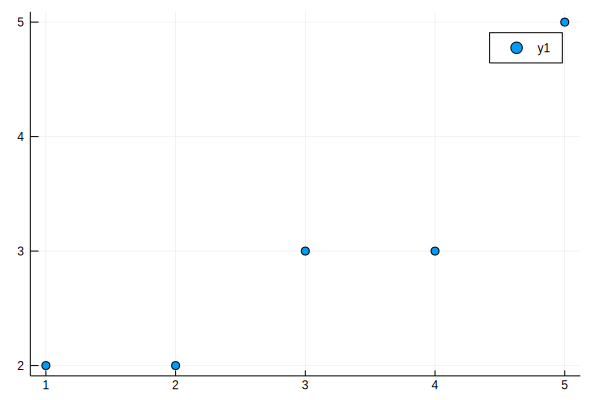

In [2]:
scatter(1:1:5, [2,2,3,3,5])

<b> Zadanie 1 </b>  Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float32, Float64 oraz liczby, 
która jest inicjalizowana jako Float32, a potem rzutowana na Float64.

In [3]:
bitstring(Float32(1/3))

"00111110101010101010101010101011"

In [4]:
bitstring(Float64(1/3))

"0011111111010101010101010101010101010101010101010101010101010101"

In [5]:
bitstring(Float64(Float32(1/3)))

"0011111111010101010101010101010101100000000000000000000000000000"

<b>Zadanie 2</b> Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000.0 z krokiem 1.0.

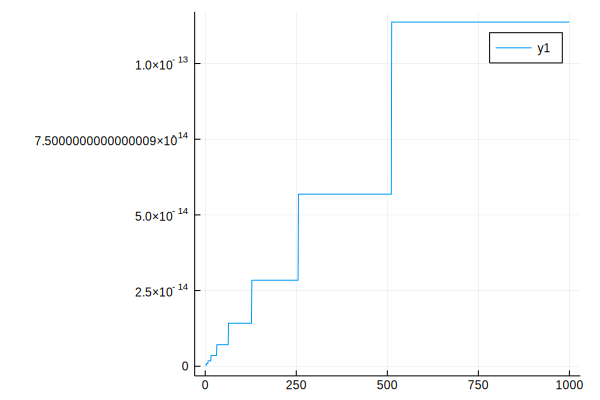

In [8]:
c=Float64[]
for i=1:1000
    push!(c, eps(Float64(i)))
end
plot(1:1000, c)

<b>Zadanie 3</b> Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

<b>Zadanie 4</b> Wymyślić własny przykład algorytmu niestablinego numerycznie. 
1. Zademostrować wersję niestabilną, pokazać, że działa źle.
2. Wyjaśnić, dlaczego działa źle.
3. Zademonstować wersję stabilną.
4. Język dowolny.

In [2]:
function unstable_quadratic(a, b, c)
    discr = b^2 - 4*a*c
    discr >= 0 ?   ( (-b + sqrt(discr))/(2a), (-b - sqrt(discr))/(2a) ) : error("Only complex roots")
end

unstable_quadratic (generic function with 1 method)

In [24]:
function stable_quadratic(a, b, c)
    discr = b^2 - 4*a*c
    x1 = 0
    x2 = 0
    if discr < 0 
        error("Only complex roots")
    end
    if b >= 0
        x2 = (-b - sqrt(discr))/(2a)
        x1 = c / (a * x2)
    else
        x1 = (-b + sqrt(discr))/(2a)
        x2 = c / (a * x1)
    end
    
    return (x1, x2)
end


stable_quadratic (generic function with 1 method)

In [37]:
a = 1.0
b = 2.0
c = 1.0

unstable = unstable_quadratic(a, b, c)
println("ustable: $unstable")

stable = stable_quadratic(a, b, c)
println("stable: $stable")

println(string("unstable == stable: ", unstable == stable))

ustable: (-1.0, -1.0)
stable: (-1.0, -1.0)
unstable == stable: true


In [38]:
a = 1.0
b = -2.0
c = 1.0

unstable = unstable_quadratic(a, b, c)
println("ustable: $unstable")

stable = stable_quadratic(a, b, c)
println("stable: $stable")

println(string("unstable == stable: ", unstable == stable))

ustable: (1.0, 1.0)
stable: (1.0, 1.0)
unstable == stable: true


In [41]:
a = 10000000000000.0
b = 40000000000000.0
c = 10000000000000.0

unstable = unstable_quadratic(a, b, c)
println("ustable: $unstable")

stable = stable_quadratic(a, b, c)
println("stable: $stable")

println(string("unstable == stable: ", unstable == stable))

ustable: (-0.26794919243112264, -3.732050807568877)
stable: (-0.2679491924311227, -3.732050807568877)
unstable == stable: false


In [42]:
a = 10000000000000.0
b = -40000000000000.0
c = 10000000000000.0

unstable = unstable_quadratic(a, b, c)
println("ustable: $unstable")

stable = stable_quadratic(a, b, c)
println("stable: $stable")

println(string("unstable == stable: ", unstable == stable))

ustable: (3.732050807568877, 0.26794919243112264)
stable: (3.732050807568877, 0.2679491924311227)
unstable == stable: false
